Вероятность вырождения = : 0.25
___________________________________________________
Кол-во частиц в 0 поколении = 1
Суммарное кол-во частиц в 0 поколениях = 1
__________________________________________________
Кол-во частиц в 1 поколении = 0
Суммарное кол-во частиц в 1 поколениях = 1
___________________________________________________
Процесс выродился в: 1 поколении
Все выродились


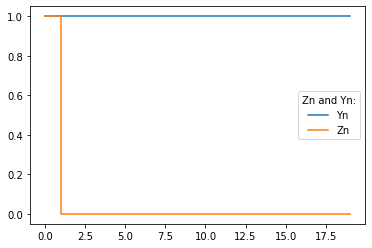

In [1]:
import math
import pylab
import matplotlib
import numpy as np
import scipy.special
import scipy.stats

n = 20
p =0.2
z = [0]*n
y = [0]*n
z[0] = 1
y[0] = 1
print("Вероятность вырождения = :", p/(1-p))

print("___________________________________________________")
print("Кол-во частиц в", 0, "поколении =", z[0])
print("Суммарное кол-во частиц в", 0, "поколениях =", y[0])

l = 0
print("__________________________________________________")

k = 10

         
for i in range(0,k-1):
    if (z[i] != 0):
        x = scipy.stats.geom.rvs(p, size = z[i])
        x -=1
        z[i+1] = np.sum(x)
        y[i+1] = y[i] + z[i+1]
        print("Кол-во частиц в", i+1, "поколении =", z[i+1])
        print("Суммарное кол-во частиц в", i+1, "поколениях =", y[i+1])
        print("___________________________________________________")
        l = l+1
    else:
        print("Процесс выродился в:", l, "поколении")
        for j in range(l,n):
            y[j] = y[l]
            z[j] = 0
        break
     
    
if (z[l] != 0):
    m = (n-k)*z[k-1]
    a = [0]*m
    for i in range(0,z[k-1]):
        a[i] = 1
    q = 0
    for i in range(0,z[k-1]):
        for j in range(0,n-k):
            x = scipy.stats.geom.rvs(p, size = a[i+j])
            x -= 1
            a[i+j+1] = np.sum(x)    
            if ((a[i+j+1] >= 0) and (a[i+j+1] <= 0)):
                q = q+1
                for s in range(j+1,n-k):
                    a[i+s+1] = 0
                    break
                


    r = 0
    for t in range(k-1,n-1):
        if (z[t] != 0):
            for i in range(0,z[k-1]):
                z[t+1] = a[i+t-k+1] +a[i+t-k+2] 
                y[t+1] = y[t] + z[t+1]
            print("Кол-во частиц в", t+1, "поколении =", z[t+1])
            print("Суммарное кол-во частиц в", t+1, "поколениях =", y[t+1])
            print("___________________________________________________")
            r = r+1
        else:
            print("Процесс выродился в:", l+r, "поколении")
            print("___________________________________________________")
            for b in range(k+r-1,n-1):
                y[b] = y[k+r-1]
                z[b] = 0
            break
            
    
if (z[k] != 0):
    print("Доля тех частиц в поколении k, чьи потомки дожили до поколения n:", (z[k]-q)/z[k])
else:
    print("Все выродились")
    
        
x_axis = np.arange(0, n)
matplotlib.pyplot.step(x_axis, y, where = 'post', label = 'Yn')
matplotlib.pyplot.step(x_axis, z, where = 'post', label = 'Zn')
matplotlib.pyplot.legend(title='Zn and Yn:')
matplotlib.pyplot.show()